In [1]:
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
from functools import lru_cache
import dtreeviz.trees as dtreeviz
import graphviz
import ipywidgets as widgets
import numpy as np
import seaborn as sns
import pandas as pd
from IPython.display import SVG, display
from ipywidgets import Button, IntSlider, interactive
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn import preprocessing, tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import (
    KBinsDiscretizer,
    LabelEncoder,
    MinMaxScaler,
    Normalizer,
    OneHotEncoder,
    OrdinalEncoder,
    PowerTransformer,
    RobustScaler,
    StandardScaler,
)
from sklearn.model_selection import StratifiedKFold
sns.set()

from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD


In [3]:
from preprocessing import obtener_datasets
from preprocessing import aplicar_preparacion
from preprocessing import conversion_numerica
from preprocessing import plot_roc_curves
from preprocessing import graficar_matriz_confusion
from preprocessing import get_dataframe_polynomial
from preprocessing import reduccion_rfecv
from preprocessing import aplicar_preparacion_generalizado
from preprocessing import conversion_numerica_generalizada

# Prueba de boosting con ada boost

In [4]:
df, df_for_prediction = obtener_datasets()
X_df, y_df = aplicar_preparacion(df)
X_df_numerico = conversion_numerica(X_df) 


Aplicando 'conversion_numerica' en las variables categóricas.


In [5]:
XX_train, XX_test, yy_train, yy_test = train_test_split(X_df_numerico, y_df, random_state=10, test_size=0.20, stratify=y_df)

In [6]:
model_boosting = GradientBoostingClassifier(max_depth=5,min_samples_leaf=100,random_state=10)

In [7]:
clf = model_boosting.fit(XX_train, yy_train)

In [8]:
yy_pred = clf.predict(XX_test)

In [9]:
yy_test

array([0, 1, 0, ..., 0, 0, 0])

Metricas

AUC-ROC score sobre test:  0.9245125590681167
AUC-ROC score sobre train:  0.9320201945084819
Accuracy sobre test:  0.8697988638108398
              precision    recall  f1-score   support

  Bajo valor       0.94      0.89      0.92      5231
  Alto valor       0.64      0.78      0.70      1282

    accuracy                           0.87      6513
   macro avg       0.79      0.84      0.81      6513
weighted avg       0.88      0.87      0.87      6513



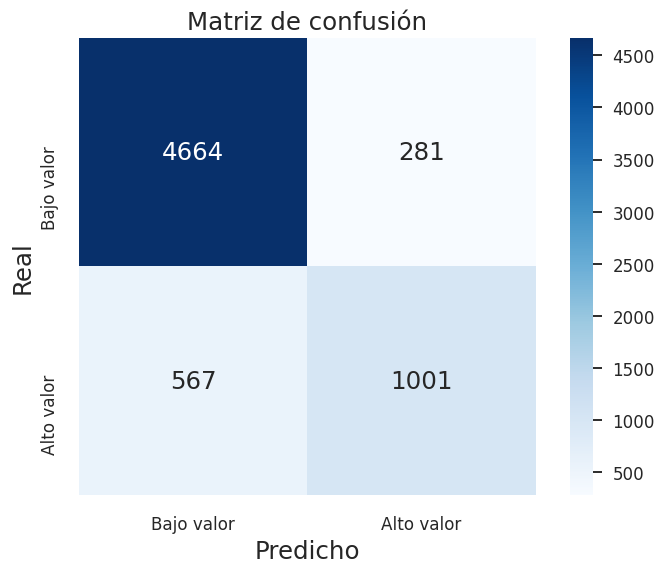

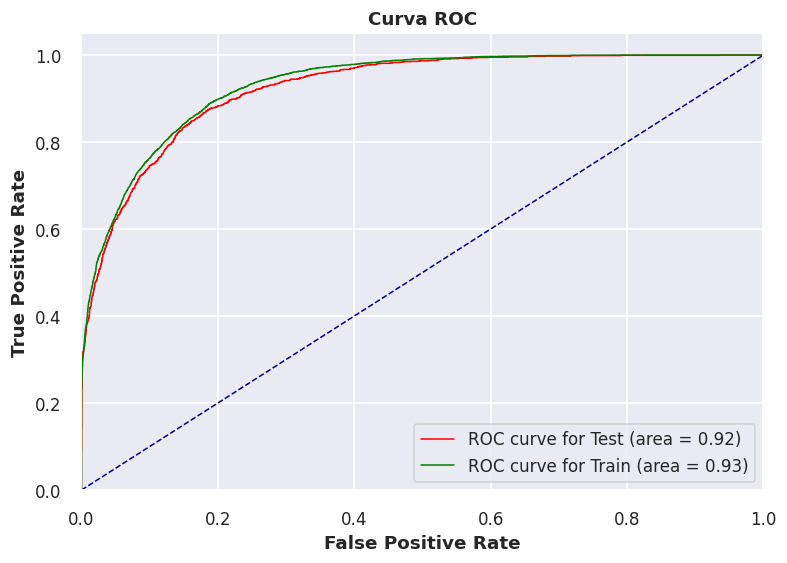

In [10]:
print("AUC-ROC score sobre test: ", "%0.16f"  % roc_auc_score(yy_test, clf.predict_proba(XX_test)[:, 1]))
print("AUC-ROC score sobre train: ", "%0.16f"  % roc_auc_score(yy_train, clf.predict_proba(XX_train)[:, 1]))
print("Accuracy sobre test: ", "%0.16f"  % accuracy_score(yy_pred, yy_test))
print(classification_report(yy_pred, yy_test, target_names=["Bajo valor", "Alto valor"]))
graficar_matriz_confusion(yy_test, yy_pred)
plot_roc_curves(clf, XX_test, yy_test, XX_train, yy_train)